In [80]:
import os
import random

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42
generate_protos = True
exp_dir = '../experiments/multi_proto-cub-978eef12a5-6-00001/custom_data'
filenames = [os.path.join(exp_dir, f) for f in os.listdir(exp_dir) if f.startswith('prototypes')]
filenames = sorted(filenames)
prototypes = np.array([np.load(f) for f in filenames])
n_tasks, n_protos, n_classes, hid_dim = prototypes.shape

if generate_protos:
    n_protos = 10
    prototypes = prototypes.repeat(n_protos, axis=1)
    #prototypes = prototypes.reshape(n_tasks, n_protos, n_classes, hid_dim)
    prototypes = prototypes + np.random.randn(*prototypes.shape)

In [82]:
prototypes = prototypes.reshape(n_tasks, n_protos * n_classes, hid_dim)
classes = np.repeat(np.arange(n_classes), n_protos)

In [83]:
TASK = 9

In [84]:
tsne = TSNE(random_state=random_state, verbose=1)
tsne.fit(prototypes[TASK])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.122s...
[t-SNE] Computed neighbors for 2000 samples in 4.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 3.863147
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.251938
[t-SNE] KL divergence after 1000 iterations: 3.499154


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=42, verbose=1)

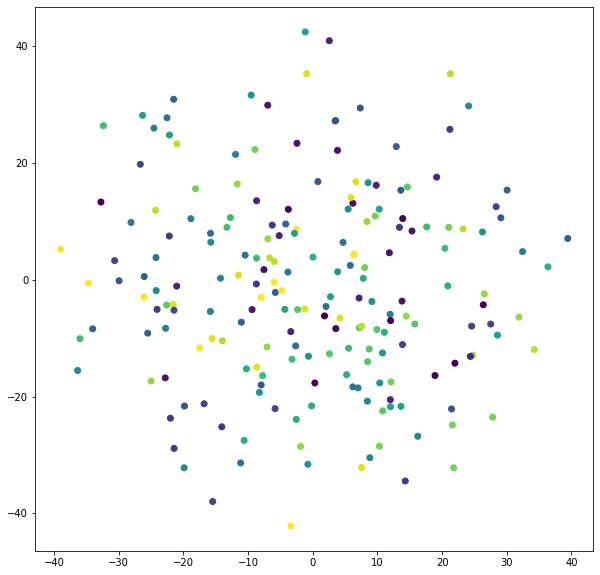

In [85]:
n_classes_to_show = 20
classes_to_show = random.sample(range(n_classes), k=n_classes_to_show)
classes_to_show = set(classes_to_show)

idx = [i for i, y in enumerate(classes) if y in classes_to_show]
colors = [list(classes_to_show).index(c) for c in classes[idx]]

plt.figure(figsize=(10, 10))
plt.scatter(tsne.embedding_[idx, 0], tsne.embedding_[idx][:, 1], c=colors)